# Multiclass classification with satellite data 

The dataset comes from the <a href='https://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29'>UCI machine learning website</a>. It consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood. The aim is to predict this classification, given the multi-spectral values. In the sample database, the class of a pixel is coded as a number.

The Landsat satellite data is one of the many sources of information available for a scene. The interpretation of a scene by integrating spatial data of diverse types and resolutions including multispectral and radar data, maps indicating topography, land use etc. is extremely important. Classical statistical methods are ill-equipped for handling such diverse data types.

One frame of Landsat MSS imagery consists of four digital images of the same scene in different spectral bands. Two of these are in the visible region (corresponding approximately to green and red regions of the visible spectrum) and two are in the (near) infra-red. Each pixel is a 8-bit binary word, with 0 corresponding to black and 255 to white. The spatial resolution of a pixel is about 80m x 80m. Each image contains 2340 x 3380 such pixels.

The database is a (tiny) sub-area of a scene, consisting of 82 x 100 pixels. Each line of data corresponds to a 3x3 square neighbourhood of pixels completely contained within the 82x100 sub-area. Each line contains the pixel values in the four spectral bands (converted to ASCII) of each of the 9 pixels in the 3x3 neighbourhood and a number indicating the classification label of the central pixel. The number is a code for the following classes:

Number Class
* 1 red soil
* 2 cotton crop
* 3 grey soil
* 4 damp grey soil
* 5 soil with vegetation stubble
* 6 mixture class (all types present)
* 7 very damp grey soil

NB. There are no examples with class 6 in this dataset.

The data is given in random order and certain lines of data have been removed so you cannot reconstruct the original image from this dataset.

In each line of data the four spectral values for the top-left pixel are given first followed by the four spectral values for the top-middle pixel and then those for the top-right pixel, and so on with the pixels read out in sequence left-to-right and top-to-bottom. Thus, the four spectral values for the central pixel are given by attributes 17,18,19 and 20. If you like you can use only these four attributes, while ignoring the others. This avoids the problem which arises when a 3x3 neighbourhood straddles a boundary.


In [ ]:
# Import neccessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math

In [ ]:
# Read data 
data = pd.read_csv("./data/sat.trn",header=None)
data


,0
0,92 115 120 94 84 102 106 79 84 102 102 83 101 ...
1,84 102 106 79 84 102 102 83 80 102 102 79 92 1...
2,84 102 102 83 80 102 102 79 84 94 102 79 84 10...
3,80 102 102 79 84 94 102 79 80 94 98 76 84 99 1...
4,84 94 102 79 80 94 98 76 80 102 102 79 84 99 1...
...,...
4430,56 64 108 96 64 71 108 96 68 75 108 96 59 75 1...
4431,64 71 108 96 68 75 108 96 71 87 108 88 67 87 1...
4432,68 75 108 96 71 87 108 88 71 91 100 81 67 95 1...
4433,71 87 108 88 71 91 100 81 76 95 108 88 75 99 1...


In [ ]:
# Preprocess data
test_list = []
for ind in range(len(data)):
    test_list.append(data.iloc[ind,0])
    #print(data.iloc[ind,0])

ind_strList = []
new_list = []
for str_list in test_list:
    split_test = str_list.split(" ")
    #print(split_test)
    sub_indList = []
    sub_list = []
    for ind2 in range(len(split_test)):
        sub_str = split_test[ind2]
        try:
            int_sub = int(sub_str)
            #print(int_sub)
            sub_list.append(int_sub)
        except ValueError:
            int_sub = sub_str
            #print(int_sub)
            sub_list.append(int_sub)
            sub_indList.append(ind2)
            
    new_list.append(sub_list)
    ind_strList.append(sub_indList)

#print(new_list[10])
#print(ind_strList[10])
for ind3 in range(len(new_list)):
    #print(new_list[ind3])
    select_str = []
    # access string by index
    for ind_str2 in range(len(ind_strList[ind3])):
        #print(ind_strList[ind3][ind_str2])
        #print(new_list[ind3][ind_strList[ind3][ind_str2]])
        ind_substr = ind_strList[ind3][ind_str2] # get index string
        select_str.append(new_list[ind3][ind_substr]) # new_list[0][36]
        
        
    # merge str 
    merge_str = " ".join(select_str)
    merge_str = merge_str.replace('"','') # ' " '
    # remove orinal string
    for rm_ori in select_str:
        new_list[ind3].remove(rm_ori)
    
    # add new modified string
    new_list[ind3].append(merge_str)
        
    #print(select_str)
    #print("new:",merge_str)
    print(new_list[ind3])
    print("--------")
    
    
# Split the columns base on ' ' and expand into separate columns
#data = data[0].str.split(' ',expand=True) 

# Clean String
# the data is image resolution (4435 pixel)
#data


[92, 115, 120, 94, 84, 102, 106, 79, 84, 102, 102, 83, 101, 126, 133, 103, 92, 112, 118, 85, 84, 103, 104, 81, 102, 126, 134, 104, 88, 121, 128, 100, 84, 107, 113, 87, 'grey soil']
--------
[84, 102, 106, 79, 84, 102, 102, 83, 80, 102, 102, 79, 92, 112, 118, 85, 84, 103, 104, 81, 84, 99, 104, 78, 88, 121, 128, 100, 84, 107, 113, 87, 84, 99, 104, 79, 'grey soil']
--------
[84, 102, 102, 83, 80, 102, 102, 79, 84, 94, 102, 79, 84, 103, 104, 81, 84, 99, 104, 78, 84, 99, 104, 81, 84, 107, 113, 87, 84, 99, 104, 79, 84, 99, 104, 79, 'grey soil']
--------
[80, 102, 102, 79, 84, 94, 102, 79, 80, 94, 98, 76, 84, 99, 104, 78, 84, 99, 104, 81, 76, 99, 104, 81, 84, 99, 104, 79, 84, 99, 104, 79, 84, 103, 104, 79, 'grey soil']
--------
[84, 94, 102, 79, 80, 94, 98, 76, 80, 102, 102, 79, 84, 99, 104, 81, 76, 99, 104, 81, 76, 99, 108, 85, 84, 99, 104, 79, 84, 103, 104, 79, 79, 107, 109, 87, 'grey soil']
--------
[80, 94, 98, 76, 80, 102, 102, 79, 76, 102, 102, 79, 76, 99, 104, 81, 76, 99, 108, 85, 76, 

In [4]:
data = pd.DataFrame(new_list)
data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,grey soil
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,grey soil
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,grey soil
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,grey soil
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,grey soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,soil with vegetation stubble
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,soil with vegetation stubble
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,damp grey soil
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,damp grey soil


In [ ]:
# Check class
data[36].unique()

#data = data[data.columns[:36]]
#sat_data = data.iloc[0,:].drop(36).astype('int')
#sat_data

array(['grey soil', 'damp grey soil', 'soil with vegetation stubble',
       'very damp grey soil', 'cotton crop', 'red soil'], dtype=object)

# Visualizing the data
The satellite data that we have consists of 4 channels (4 images) each of 3x3 pixels. So this is a tiny bit of satellite data per each image.<br>
Let's visualise the data for the first image in the dataset. 

array([[ 92, 115, 120,  94,  84, 102, 106,  79,  84],
       [102, 102,  83, 101, 126, 133, 103,  92, 112],
       [118,  85,  84, 103, 104,  81, 102, 126, 134],
       [104,  88, 121, 128, 100,  84, 107, 113,  87]])

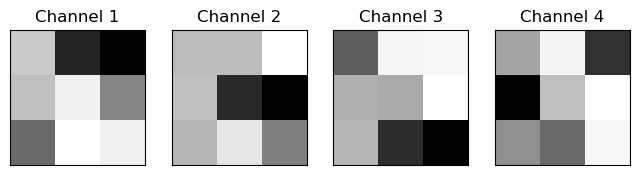

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,4,figsize=(8,32))

#sat_data = data.iloc[0,:].drop(36).astype('int')
sat_data = data.iloc[0,:].drop(36).astype('int')
channels = sat_data.values.reshape(4,9) # 1 Channel len-> 9

# 1 row -> 4 channel | ch1 -> 0-8 , ch2 -> 9-17, ch3 -> 18-26
for ax, channel, i in zip(axes, channels,[1,2,3,4]):
    ax.imshow(channel.reshape(3,3), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'Channel {i}')
channels


### Color images

The dataset does not specify the meaning of each channel. But if we assume that the first three channels represent the RGB component of a color image, and the 4th one is the near-infrared spectrum, we can draw the same data in color plus one near-infrared image:

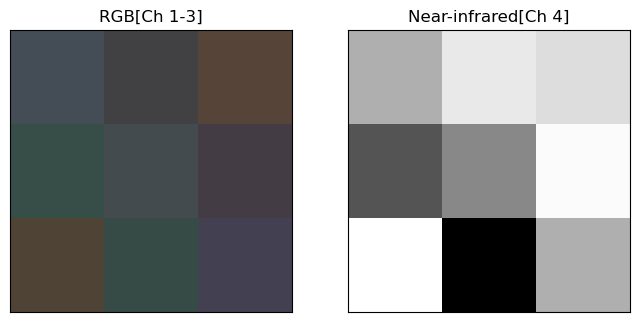

In [7]:

fig, axes = plt.subplots(1,2,figsize=(8,16))
titles = ['RGB[Ch 1-3]', 'Near-infrared[Ch 4]']

sat_data = data.iloc[50,:].drop(36).astype('float')
channels = sat_data.values.reshape(4,9)

rgb = np.uint8(channels[0:3].reshape(3,3,3))
axes[0].imshow(rgb, alpha=1)
axes[1].imshow(channels[3].reshape(3,3), cmap='Greys')

for ax, title in zip(axes, titles):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title)

### More on images



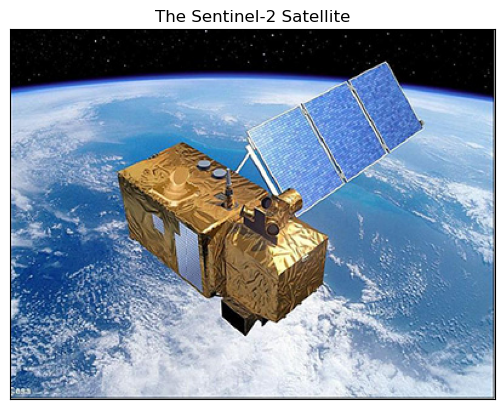

In [8]:
import cv2

img = cv2.imread('data/Sentinel-2.jpeg')
img_show = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ax = plt.subplot()
plt.imshow(img_show)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('The Sentinel-2 Satellite');

In [9]:
print(f'The type of this image object is: {type(img)}')
print(f'The shape of this image object is: {img.shape}')

The type of this image object is: <class 'numpy.ndarray'>
The shape of this image object is: (305, 400, 3)


# Preparing the target and splitting


In [10]:
# Label encode 
from sklearn.preprocessing import LabelEncoder
class_name = data[data.columns[-1]].unique()
print(class_name)
label_encoder = LabelEncoder()
label_encoder.fit(data[data.columns[-1]])
data[data.columns[-1]] = label_encoder.transform(data[data.columns[-1]])
class_encode = data[data.columns[-1]].unique()
print(class_encode)
data

['grey soil' 'damp grey soil' 'soil with vegetation stubble'
 'very damp grey soil' 'cotton crop' 'red soil']
[2 1 4 5 0 3]


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,2
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,2
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,2
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,2
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,4
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,4
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,1
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,1


In [ ]:

# Prepare features and targets
X = data.drop(columns=data.columns[-1])
y = data[data.columns[-1]]

# normallize data [image]
X = X/255
X  = X.astype(float)

# count class 
print(y.value_counts().sort_values(ascending=False))
X

3    1072
5    1038
2     961
0     479
4     470
1     415
Name: 36, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.360784,0.450980,0.470588,0.368627,0.329412,0.400000,0.415686,0.309804,0.329412,0.400000,...,0.525490,0.407843,0.345098,0.474510,0.501961,0.392157,0.329412,0.419608,0.443137,0.341176
1,0.329412,0.400000,0.415686,0.309804,0.329412,0.400000,0.400000,0.325490,0.313725,0.400000,...,0.501961,0.392157,0.329412,0.419608,0.443137,0.341176,0.329412,0.388235,0.407843,0.309804
2,0.329412,0.400000,0.400000,0.325490,0.313725,0.400000,0.400000,0.309804,0.329412,0.368627,...,0.443137,0.341176,0.329412,0.388235,0.407843,0.309804,0.329412,0.388235,0.407843,0.309804
3,0.313725,0.400000,0.400000,0.309804,0.329412,0.368627,0.400000,0.309804,0.313725,0.368627,...,0.407843,0.309804,0.329412,0.388235,0.407843,0.309804,0.329412,0.403922,0.407843,0.309804
4,0.329412,0.368627,0.400000,0.309804,0.313725,0.368627,0.384314,0.298039,0.313725,0.400000,...,0.407843,0.309804,0.329412,0.403922,0.407843,0.309804,0.309804,0.419608,0.427451,0.341176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,0.219608,0.250980,0.423529,0.376471,0.250980,0.278431,0.423529,0.376471,0.266667,0.294118,...,0.423529,0.360784,0.258824,0.325490,0.423529,0.376471,0.258824,0.341176,0.407843,0.349020
4431,0.250980,0.278431,0.423529,0.376471,0.266667,0.294118,0.423529,0.376471,0.278431,0.341176,...,0.423529,0.376471,0.258824,0.341176,0.407843,0.349020,0.247059,0.341176,0.407843,0.349020
4432,0.266667,0.294118,0.423529,0.376471,0.278431,0.341176,0.423529,0.345098,0.278431,0.356863,...,0.407843,0.349020,0.247059,0.341176,0.407843,0.349020,0.274510,0.392157,0.407843,0.333333
4433,0.278431,0.341176,0.423529,0.345098,0.278431,0.356863,0.392157,0.317647,0.298039,0.372549,...,0.407843,0.349020,0.274510,0.392157,0.407843,0.333333,0.274510,0.356863,0.407843,0.333333


In [12]:
# Split data to train and test sets 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=42)

# Check size of train and test set 
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(4435, 36)
(1330, 36)
(3105, 36)


# Dummy Model


In [ ]:

# Create dummy model 
from sklearn.dummy import DummyClassifier
#“most_frequent”, “prior”, “stratified”, “uniform”, “constant”

dummy_model = DummyClassifier(strategy="stratified") #instanciate model 
#'stratified': Predicts classes based on the class distribution in the training set.
#'most_frequent': Always predicts the most frequent class.X
#'uniform': Predicts classes uniformly at random.
#'constant': Always predicts a specified constant class. (Requires specifying the constant class using the constant parameter.)

dummy_model.fit(X_train,y_train)


DummyClassifier(strategy='stratified')

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
def evaluate_metrics(y_true,y_pred,model):
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred,average="macro")
    recall = recall_score(y_true,y_pred,average="macro")
    f1_sc = f1_score(y_true,y_pred,average="macro")
    cm = confusion_matrix(y_true,y_pred,labels=model.classes_)

    return accuracy,precision,recall,f1_sc,cm

In [15]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
# Predict test set
pred_dummy = dummy_model.predict(X_test)# predict X test 

# Evaluate Classification model
dummy_accuracy,dummy_precision,dummy_recall,dummy_f1,dummy_cm = evaluate_metrics(y_test,pred_dummy,dummy_model)

print("Acc:",dummy_accuracy)
print("Precision:",dummy_precision)
print("Recall:",dummy_recall)
print("F1 Score:",dummy_f1)
print(dummy_cm)




Acc: 0.18293075684380034
Precision: 0.1603654472341978
Recall: 0.16060288446193696
F1 Score: 0.16024492619789008
[[ 37  34  74  82  36  75]
 [ 29  31  61  59  28  63]
 [ 73  71 142 155  77 155]
 [ 75  80 182 167  80 188]
 [ 31  29  79  77  29  82]
 [ 75  78 160 165  84 162]]


              precision    recall  f1-score   support

           0       0.12      0.11      0.11       338
           1       0.10      0.11      0.10       271
           2       0.20      0.21      0.21       673
           3       0.24      0.22      0.23       772
           4       0.09      0.09      0.09       327
           5       0.22      0.22      0.22       724

    accuracy                           0.18      3105
   macro avg       0.16      0.16      0.16      3105
weighted avg       0.19      0.18      0.18      3105



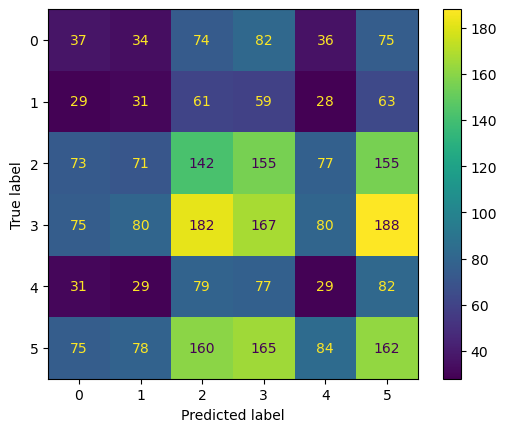

In [16]:
# 
print(classification_report(y_test,pred_dummy))
dummy_disp_cm = ConfusionMatrixDisplay(confusion_matrix=dummy_cm,display_labels=dummy_model.classes_)
dummy_disp_cm.plot()

In [ ]:
# Print to see detail
#inverse_target = y_test.inverse_transform()
#print(inverse_target)
print()
print(class_name)
print(class_encode)
dict_class = dict(zip(class_encode,class_name))
print(dict_class)
best_performer = dict_class[2]
print(best_performer)



['grey soil' 'damp grey soil' 'soil with vegetation stubble'
 'very damp grey soil' 'cotton crop' 'red soil']
[2 1 4 5 0 3]
{2: 'grey soil', 1: 'damp grey soil', 4: 'soil with vegetation stubble', 5: 'very damp grey soil', 0: 'cotton crop', 3: 'red soil'}
grey soil


In [ ]:
# Plot graph and confusion metrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred):
    plt.figure(figsize=(6,4))
    plt.xlabel("Predicted Labels"),plt.ylabel("True Labels")
    cm = confusion_matrix(y_true,y_pred)
    sns.heatmap(cm,annot=True,cmap="seismic")
    pass


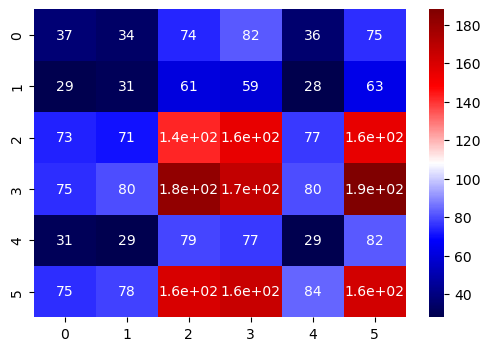

In [ ]:
# Create confusion metrix
make_confusion_matrix(y_test, pred_dummy)

# Baseline Model


In [22]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

baseline_model1 = LogisticRegression(multi_class="ovr",max_iter=5000)#instanciate model

# train model 
baseline_model1.fit(X_train,y_train)



LogisticRegression(max_iter=5000, multi_class='ovr')

In [23]:
# predict model 
baseline1_pred = baseline_model1.predict(X_test)

# Evaluate model 
accuracy_ovr,precision_ovr,recall_ovr,f1_ovr,cm_ovr=evaluate_metrics(y_test,baseline1_pred,baseline_model1)

print("Acc:",accuracy_ovr)
print("Precision:",precision_ovr)
print("Recall:",recall_ovr)
print("F1 Score:",f1_ovr)
print(cm_ovr)

Acc: 0.807085346215781
Precision: 0.7049097656451626
Recall: 0.6857285844223858
F1 Score: 0.6641731271490845
[[310   1   4   9   8   6]
 [  0   0  97  13   1 160]
 [  0   0 660   5   0   8]
 [  0   0  20 749   2   1]
 [ 19   0   2  32  95 179]
 [  0   0  31   0   1 692]]


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       338
           1       0.00      0.00      0.00       271
           2       0.81      0.98      0.89       673
           3       0.93      0.97      0.95       772
           4       0.89      0.29      0.44       327
           5       0.66      0.96      0.78       724

    accuracy                           0.81      3105
   macro avg       0.70      0.69      0.66      3105
weighted avg       0.76      0.81      0.76      3105



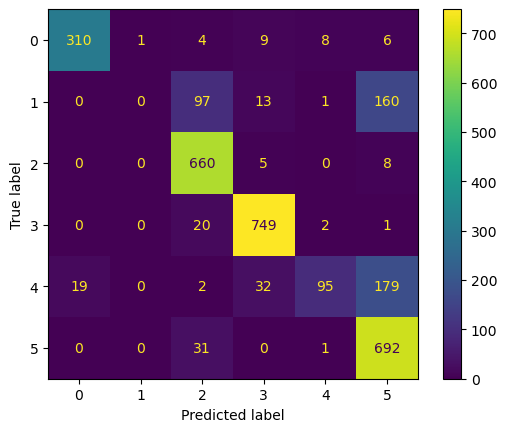

In [ ]:

print(classification_report(y_test,baseline1_pred))
baseline1_disp_cm=ConfusionMatrixDisplay(confusion_matrix=cm_ovr,display_labels=baseline_model1.classes_)
baseline1_disp_cm.plot()

## Changing the multiclassification strategy
use the `multinomial` approach instead 

In [ ]:

baseline2_model = LogisticRegression(multi_class="multinomial",max_iter=5000)

baseline2_model.fit(X_train,y_train)


LogisticRegression(max_iter=5000, multi_class='multinomial')

In [26]:
# predict model 
baseline2_pred = baseline2_model.predict(X_test)

# Evaluate metrics
accuracy_mul,precision_mul,recall_mul,f1_mul,cm_mul=evaluate_metrics(y_test,baseline2_pred,baseline2_model)

print("Acc:",accuracy_mul)
print("Precision:",precision_mul)
print("Recall:",recall_mul)
print("F1 Score:",f1_mul)
print(cm_mul)

Acc: 0.8276972624798712
Precision: 0.7807814357200762
Recall: 0.7246699168171724
F1 Score: 0.7133826740301759
[[289   2   0  15  30   2]
 [  0   7  90  14   3 157]
 [  0   2 657   6   0   8]
 [  0   0  21 731  20   0]
 [  7   0   1  31 191  97]
 [  0   4  20   0   5 695]]


              precision    recall  f1-score   support

           0       0.98      0.86      0.91       338
           1       0.47      0.03      0.05       271
           2       0.83      0.98      0.90       673
           3       0.92      0.95      0.93       772
           4       0.77      0.58      0.66       327
           5       0.72      0.96      0.83       724

    accuracy                           0.83      3105
   macro avg       0.78      0.72      0.71      3105
weighted avg       0.81      0.83      0.79      3105



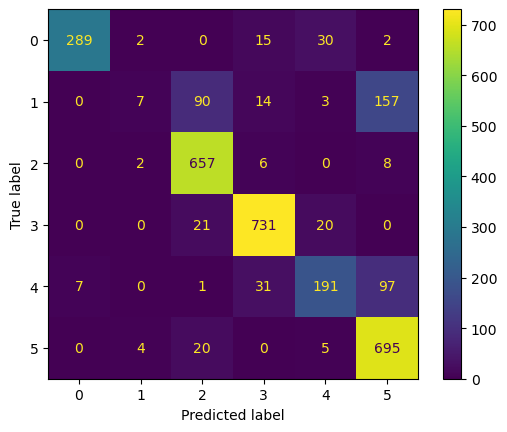

In [27]:
print(classification_report(y_test,baseline2_pred))
baseline2_disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm_mul,display_labels=baseline2_model.classes_)
baseline2_disp_cm.plot()

# 🌳 Ensemble Models


In [ ]:
# Train model using RandomForest
from sklearn.ensemble import RandomForestClassifier
randomf_model = RandomForestClassifier()
randomf_model.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
# Predict model
randomf_pred = randomf_model.predict(X_test)

# Evaluate 
acc_rf,precision_rf,recall_rf,f1_rf,cm_rf=evaluate_metrics(y_test,randomf_pred,randomf_model)

print("Acc:",acc_rf)
print("Precision:",precision_rf)
print("Recall:",recall_rf)
print("F1 Score:",f1_rf)
print(cm_rf)

Acc: 0.8933977455716586
Precision: 0.8681963646408039
Recall: 0.859170320780886
F1 Score: 0.8626979130954929
[[315   4   4   2  10   3]
 [  2 152  60   3   7  47]
 [  0  16 647   3   0   7]
 [  3   0  16 736  16   1]
 [  4   5   0  14 281  23]
 [  0  55   5   0  21 643]]


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       338
           1       0.66      0.56      0.60       271
           2       0.88      0.96      0.92       673
           3       0.97      0.95      0.96       772
           4       0.84      0.86      0.85       327
           5       0.89      0.89      0.89       724

    accuracy                           0.89      3105
   macro avg       0.87      0.86      0.86      3105
weighted avg       0.89      0.89      0.89      3105



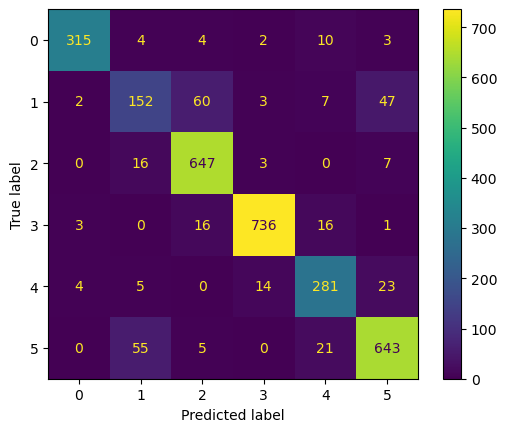

In [32]:
#
print(classification_report(y_test,randomf_pred))
rf_disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=randomf_model.classes_)
rf_disp_cm.plot()

In [ ]:

f1_difference = abs(f1_mul - f1_rf)
print(f1_difference)


0.14931523906531707


In [42]:
# Check shape 

print(X.shape)
print(y.shape)

(4435, 36)
(4435,)


In [ ]:

final_model = RandomForestClassifier()

# Train all data (no test set and no evaluate)
final_model.fit(X,y)


RandomForestClassifier()

# Test model with test set (Unseen dataset)

In [ ]:

label_test = pd.read_csv("tests/test_data.csv",header=None)
test_data = pd.read_csv("data/test.dat",header=None) # no label only feature 
print(label_test)
test_data

                                 0
0                        grey soil
1                        grey soil
2                   damp grey soil
3                   damp grey soil
4                   damp grey soil
...                            ...
1995                      red soil
1996                      red soil
1997  soil with vegetation stubble
1998  soil with vegetation stubble
1999  soil with vegetation stubble

[2000 rows x 1 columns]


,0
0,80 102 102 79 76 102 102 79 76 102 106 83 76 9...
1,76 102 102 79 76 102 106 83 76 102 106 87 76 1...
2,80 98 106 79 76 94 102 76 76 94 102 76 80 107 ...
3,76 94 102 76 76 94 102 76 76 94 102 76 80 95 1...
4,76 94 102 76 76 94 102 76 76 89 94 76 80 95 10...
...,...
1995,60 83 96 85 64 87 100 88 64 83 104 88 59 83 10...
1996,64 79 100 85 56 71 96 85 56 68 91 81 63 79 100...
1997,56 68 91 81 56 64 91 81 53 64 83 78 59 72 96 8...
1998,56 68 87 74 60 71 91 81 60 64 104 99 59 79 89 ...


In [37]:
#Spliting data
test_data = test_data[0].str.split(' ',expand=True).astype(float)
test_data = (test_data/255).astype(float)
test_data



,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.313725,0.400000,0.400000,0.309804,0.298039,0.400000,0.400000,0.309804,0.298039,0.400000,...,0.427451,0.341176,0.309804,0.419608,0.427451,0.341176,0.309804,0.419608,0.443137,0.341176
1,0.298039,0.400000,0.400000,0.309804,0.298039,0.400000,0.415686,0.325490,0.298039,0.400000,...,0.427451,0.341176,0.309804,0.419608,0.443137,0.341176,0.309804,0.403922,0.407843,0.325490
2,0.313725,0.384314,0.415686,0.309804,0.298039,0.368627,0.400000,0.298039,0.298039,0.368627,...,0.407843,0.309804,0.309804,0.372549,0.392157,0.309804,0.309804,0.372549,0.376471,0.294118
3,0.298039,0.368627,0.400000,0.298039,0.298039,0.368627,0.400000,0.298039,0.298039,0.368627,...,0.392157,0.309804,0.309804,0.372549,0.376471,0.294118,0.309804,0.372549,0.392157,0.294118
4,0.298039,0.368627,0.400000,0.298039,0.298039,0.368627,0.400000,0.298039,0.298039,0.349020,...,0.376471,0.294118,0.309804,0.372549,0.392157,0.294118,0.294118,0.372549,0.392157,0.309804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.235294,0.325490,0.376471,0.333333,0.250980,0.341176,0.392157,0.345098,0.250980,0.325490,...,0.407843,0.360784,0.258824,0.341176,0.423529,0.349020,0.247059,0.325490,0.407843,0.333333
1996,0.250980,0.309804,0.392157,0.333333,0.219608,0.278431,0.376471,0.333333,0.219608,0.266667,...,0.392157,0.333333,0.258824,0.325490,0.392157,0.333333,0.247059,0.325490,0.392157,0.317647
1997,0.219608,0.266667,0.356863,0.317647,0.219608,0.250980,0.356863,0.317647,0.207843,0.250980,...,0.392157,0.317647,0.231373,0.341176,0.376471,0.317647,0.247059,0.325490,0.360784,0.290196
1998,0.219608,0.266667,0.341176,0.290196,0.235294,0.278431,0.356863,0.317647,0.235294,0.250980,...,0.376471,0.290196,0.231373,0.325490,0.360784,0.290196,0.231373,0.325490,0.360784,0.274510


In [ ]:
# Encode label
label_encode_final = LabelEncoder()
label_encode_final.fit(label_test)
label_test = label_encode_final.transform(label_test)
label_test

c:\Users\Worra\anaconda3\envs\ML_DL\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Worra\anaconda3\envs\ML_DL\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2, 2, 1, ..., 4, 4, 4])

In [ ]:
# Predict result using test set
predictions = final_model.predict(test_data)
#encoder = LabelEncoder().fit_transform()

# Evaluate final model 
final_accuracy,final_precision,final_recall,final_f1,final_cm = evaluate_metrics(label_test,predictions,final_model)

print("Acc:",final_accuracy)
print("Precision:",final_precision)
print("Recall:",final_recall)
print("F1 Score:",final_f1)
print(final_cm)
#(precision >= 0.88) & (precision < 0.92)
#(recall >= 0.88) & (recall < 0.92)
#(f1 >= 0.88) & (f1 < 0.92)
#(accuracy >= 0.88) & (accuracy < 0.92)

Acc: 0.9085
Precision: 0.8999057536666943
Recall: 0.8883665702870914
F1 Score: 0.8928278102269908
[[217   1   1   0   3   2]
 [  1 132  34   0   2  42]
 [  0  10 378   3   1   5]
 [  1   0   1 458   1   0]
 [  3   2   1   5 213  13]
 [  0  29  11   0  11 419]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       224
           1       0.76      0.63      0.69       211
           2       0.89      0.95      0.92       397
           3       0.98      0.99      0.99       461
           4       0.92      0.90      0.91       237
           5       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



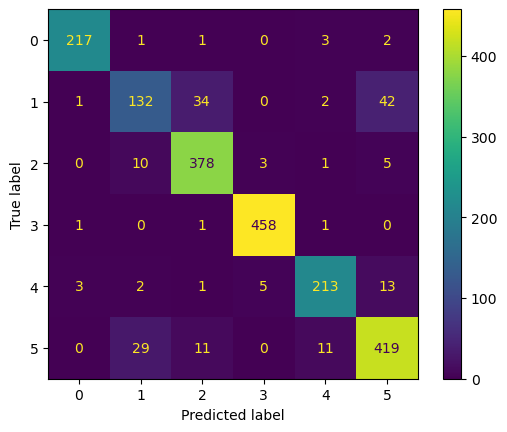

In [40]:
print(classification_report(label_test,predictions))
disp_cm_final = ConfusionMatrixDisplay(confusion_matrix=final_cm,display_labels=final_model.classes_)
disp_cm_final.plot()